<a href="https://colab.research.google.com/github/Fatima-Shahid11/NLP_Semantics_Analysis/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk


In [ ]:
import nltk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('sentiment_analysis.csv')

In [ ]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [ ]:
df.shape

(499, 7)

# EDA

In [ ]:
df['text'].values[0]

'What a great day!!! Looks like dream.'

In [ ]:
df['sentiment'].value_counts().sort_values()

,count
sentiment,
negative,134
positive,166
neutral,199


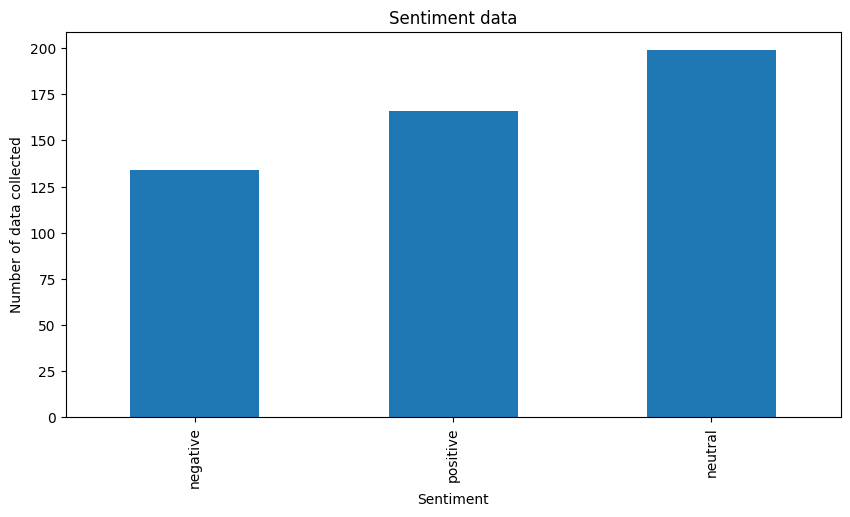

In [ ]:
ax = df['sentiment'].value_counts().sort_values().plot(kind='bar', title='Sentiment data', figsize = (10, 5))
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of data collected')
plt.show()

# NLTK

In [ ]:
example = df['text'].values[10]
example

'Love is something like E=MC^2 rules'

In [ ]:
tokens = nltk.word_tokenize(example)

In [ ]:
tags = nltk.pos_tag(tokens)
tags

[('Love', 'NNP'),
 ('is', 'VBZ'),
 ('something', 'NN'),
 ('like', 'IN'),
 ('E=MC^2', 'NNP'),
 ('rules', 'NNS')]

In [ ]:
chunk = nltk.ne_chunk(tags)
chunk.pprint()

(S (GPE Love/NNP) is/VBZ something/NN like/IN E=MC^2/NNP rules/NNS)


# Vader

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores(example)
#

{'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'compound': 0.7717}

In [ ]:
## Run it for every row in df
res = {}
for i, row in df.iterrows():
  text = row['text']
  identity = i + 1
  sia.polarity_scores(text)
  res[identity] = sia.polarity_scores(text)

In [ ]:
scores = pd.DataFrame(res).T
scores

,neg,neu,pos,compound
1,0.000,0.240,0.760,0.8582
2,0.293,0.707,0.000,-0.2263
3,0.000,0.425,0.575,0.4023
4,0.000,1.000,0.000,0.0000
5,0.000,0.843,0.157,0.0772
...,...,...,...,...
495,0.268,0.732,0.000,-0.5106
496,0.168,0.832,0.000,-0.2057
497,0.294,0.706,0.000,-0.3612
498,0.000,0.682,0.318,0.6360


In [ ]:
df['Id'] = df.index
vaders = scores.reset_index().rename(columns = {'index': 'Id'})
vaders = vaders.merge(df, how = 'left')
vaders

,Id,neg,neu,pos,compound,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,1,0.000,0.240,0.760,0.8582,2018.0,8.0,18.0,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
1,2,0.293,0.707,0.000,-0.2263,2017.0,8.0,18.0,night,Don't angry me,negative,Facebook
2,3,0.000,0.425,0.575,0.4023,2022.0,6.0,8.0,morning,We attend in the class just for listening teac...,negative,Facebook
3,4,0.000,1.000,0.000,0.0000,2022.0,6.0,8.0,noon,"Those who want to go, let them go",negative,Instagram
4,5,0.000,0.843,0.157,0.0772,2016.0,11.0,22.0,night,"Its night 2 am, feeling neutral",neutral,Facebook
...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,0.268,0.732,0.000,-0.5106,2021.0,2.0,25.0,morning,the plan to not spend money is not going well,negative,Instagram
495,496,0.168,0.832,0.000,-0.2057,2022.0,5.0,30.0,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
496,497,0.294,0.706,0.000,-0.3612,2018.0,8.0,10.0,night,congratulations ! you guys finish a month ear...,positive,Twitter
497,498,0.000,0.682,0.318,0.6360,2019.0,3.0,25.0,morning,"actually, I wish I was back in Tahoe. I miss...",negative,Instagram


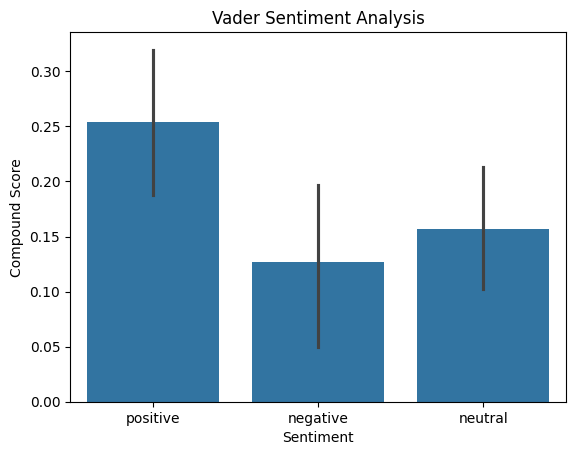

In [ ]:
# plot
ax = sns.barplot(data = vaders, x = 'sentiment', y = 'compound')
ax.set_title('Vader Sentiment Analysis')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Compound Score')
plt.show()

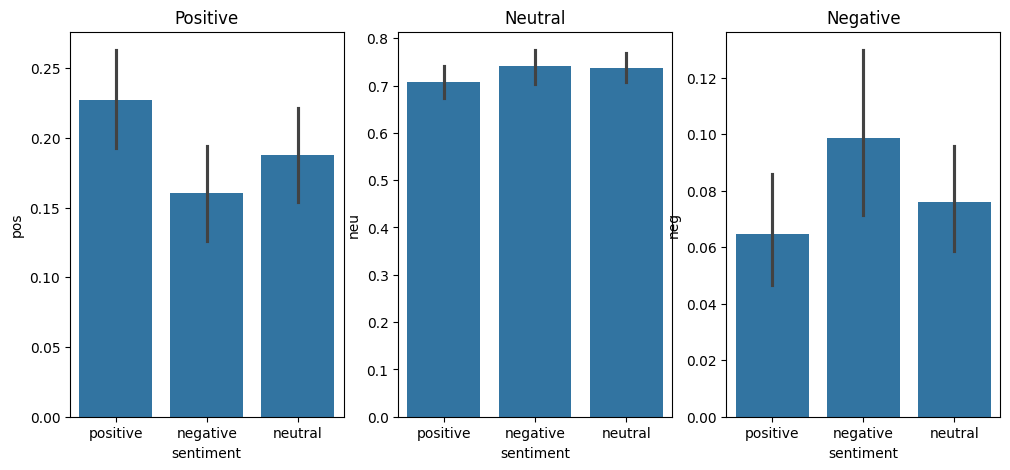

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (12, 5))
sns.barplot(data = vaders, x = 'sentiment', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'sentiment', y = 'neu', ax = axs[1])
sns.barplot(data = vaders, x = 'sentiment', y = 'neg', ax = axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

# Roberta

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

In [ ]:
from scipy.special import softmax

In [ ]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

In [ ]:
def polarity_scores_roberta(example):
    encoded_tokens = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_tokens)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    roberta_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return roberta_dict

In [ ]:
res = {}
for index, row in df.iterrows():
    try:
      text = row['text']
      identity = index + 1
      vader_res = sia.polarity_scores(text)
      vader_res_rename = {}
      for key, value in vader_res.items():
          vader_res_rename[f"vader_{key}"] = value
      roberta_res = polarity_scores_roberta(text)
      final = {**vader_res_rename, **roberta_res}
      res[identity] = final
    except:
      print(f'Error at index {index}')


In [ ]:
result = pd.DataFrame(res).T
result = result.reset_index().rename(columns = {'index': 'Id'})
result = result.merge(df, how = 'left')
result

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,1,0.000,0.240,0.760,0.8582,0.001614,0.006658,0.991728,2018.0,8.0,18.0,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
1,2,0.293,0.707,0.000,-0.2263,0.681098,0.270456,0.048446,2017.0,8.0,18.0,night,Don't angry me,negative,Facebook
2,3,0.000,0.425,0.575,0.4023,0.528436,0.430931,0.040633,2022.0,6.0,8.0,morning,We attend in the class just for listening teac...,negative,Facebook
3,4,0.000,1.000,0.000,0.0000,0.209560,0.676810,0.113630,2022.0,6.0,8.0,noon,"Those who want to go, let them go",negative,Instagram
4,5,0.000,0.843,0.157,0.0772,0.113179,0.810844,0.075977,2016.0,11.0,22.0,night,"Its night 2 am, feeling neutral",neutral,Facebook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,0.268,0.732,0.000,-0.5106,0.634476,0.348730,0.016794,2021.0,2.0,25.0,morning,the plan to not spend money is not going well,negative,Instagram
495,496,0.168,0.832,0.000,-0.2057,0.801409,0.184770,0.013822,2022.0,5.0,30.0,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
496,497,0.294,0.706,0.000,-0.3612,0.271418,0.628734,0.099847,2018.0,8.0,10.0,night,congratulations ! you guys finish a month ear...,positive,Twitter
497,498,0.000,0.682,0.318,0.6360,0.002076,0.026472,0.971452,2019.0,3.0,25.0,morning,"actually, I wish I was back in Tahoe. I miss...",negative,Instagram


# Graph Comparison

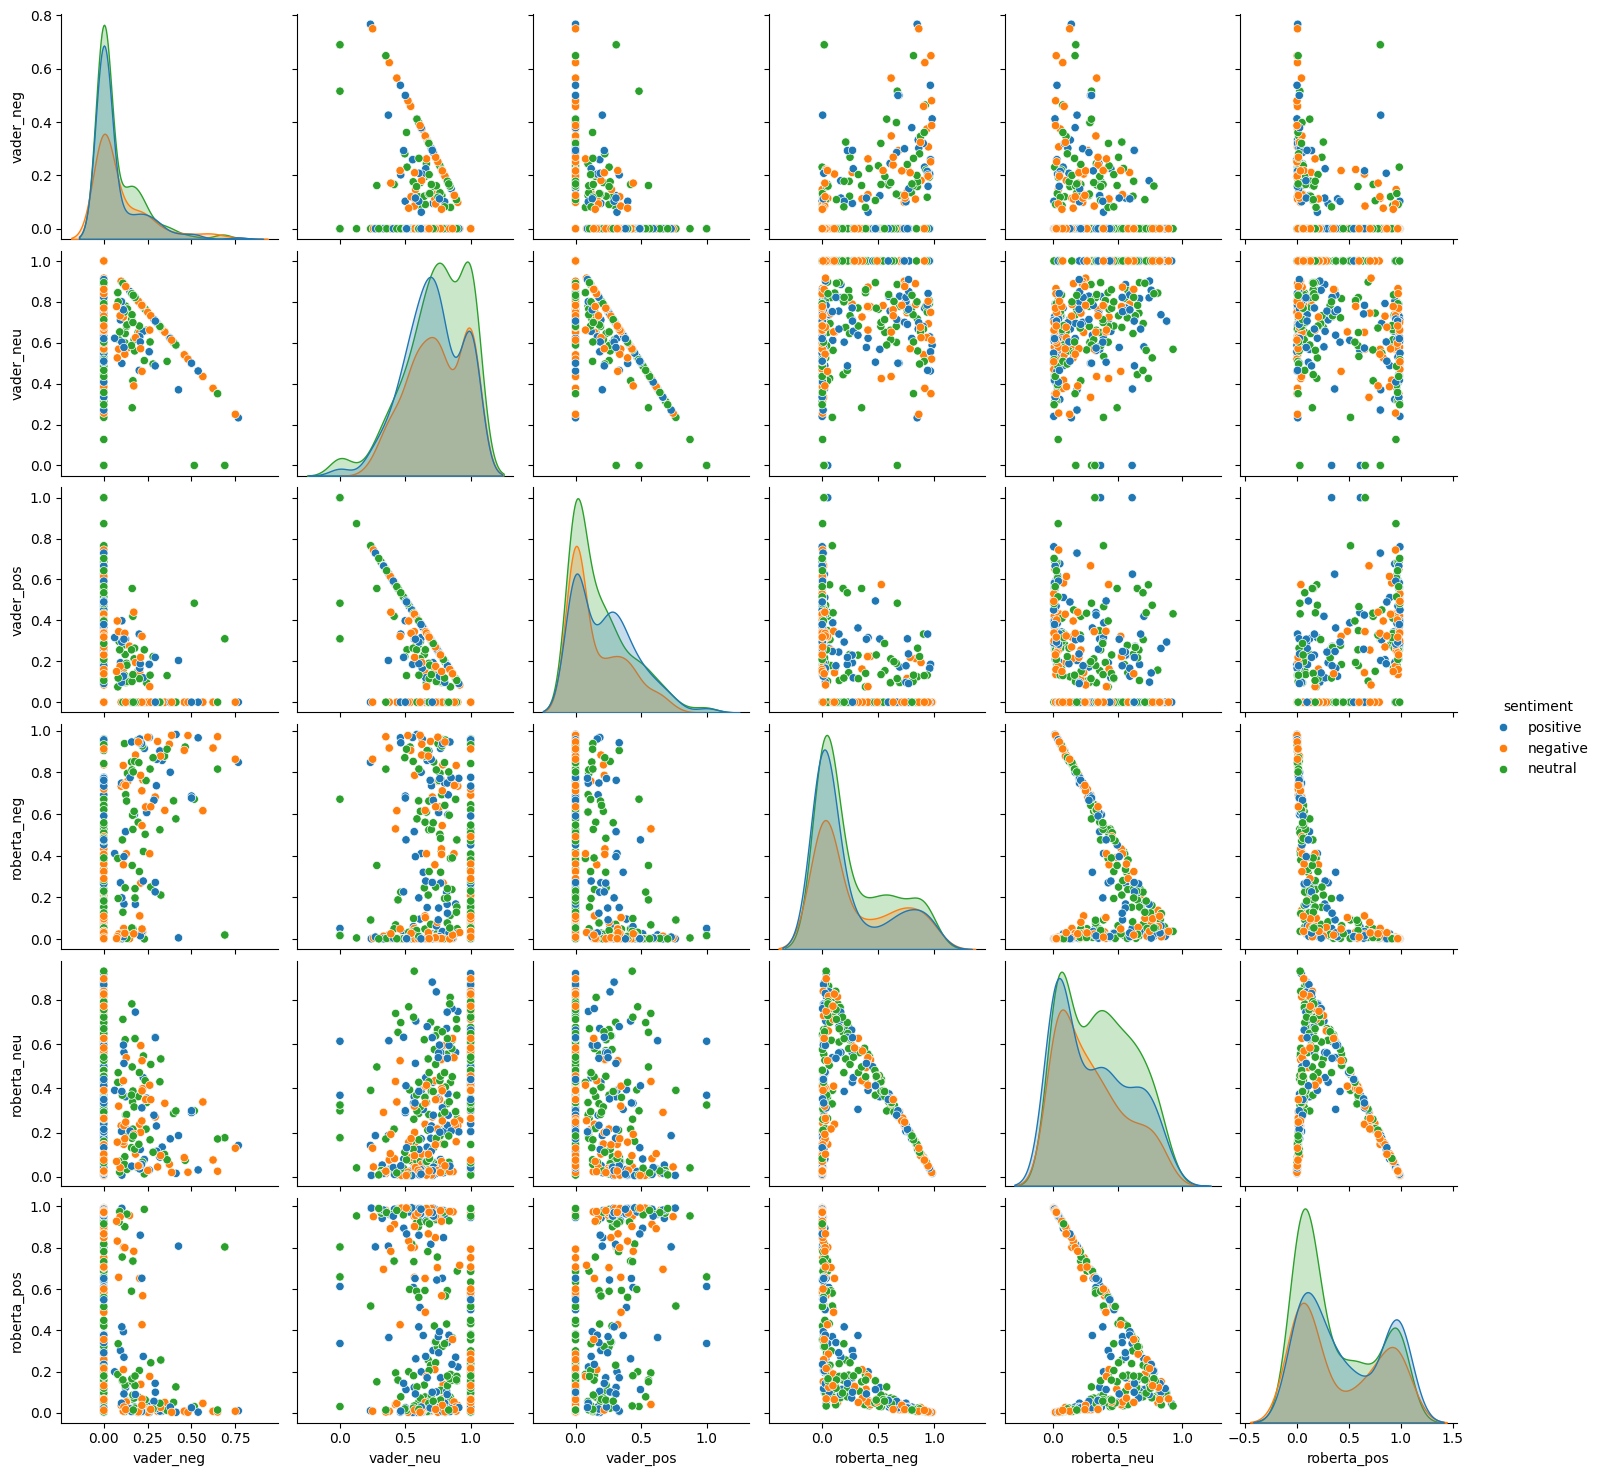

In [ ]:
sns.pairplot(result, vars = ['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], hue = 'sentiment', palette = 'tab10')
plt.show()